# Weekly Activity

In [28]:
import sys
assert sys.version_info >= (3, 8)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from utils import *

if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

# 1)Rotate image by 45 degrees without cropping the sides of the image. (Hint: There are 2 strategies to tackle these problems). Use "lena.jfif" as the input image.
- Use external libraries imutils.
- Modify the transformation matrix.


In [5]:
!pip install imutils

In [5]:
import imutils
import imutils as im

img = cv.imread("images/lena.jfif")

rotated_img = im.rotate_bound(img, angle=-45)
display_image("rotation", rotated_img)

In [9]:
img = cv.imread("images/lena.jfif")

h, w = img.shape[:2]
angle = 45

yc, xc = h // 2, w // 2

M = cv.getRotationMatrix2D((200, 80), angle, 1)
dst = cv.warpAffine(img, M, (w+yc, h+xc))

# M = np.float32([[1, 0, tx],[0, 1, ty]])
#dst_new = cv.warpAffine(dst, M, (w+150, h+150))

display_image("rotation", dst)

## 2)Use the images with titles: "flower.jfif" and "native-bee.png". I want to put flower above an image. If I add two images, it will change color. If I blend it, I get a transparent effect. But I want it to be opaque. If it was a rectangular region, we could use the ROI as we did in the previous section. But flower is not a rectangular region. This is where bitwise operations, like AND, OR, NOT and XOR really come in handy. The associated functions are cv.bitwise_and(), cv.bitwise_or() and cv.bitwise_not(). You need to use cv.threshold function to segment the flower. Please refer to online documentation for more info. The result should resemble the following:
bee and flowers

In [19]:
img = cv.imread("images/native-bee.png")
img2 = cv.imread("images/flower.jfif")

rows, cols, channels = img2.shape
roi = img[0:rows, 0:cols]

img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
#70 = intensity value of the pixel, to remove black bg, 255, maximum intensity value
ret, mask = cv.threshold(img2gray, 70, 255, cv.THRESH_BINARY) 
mask_inv = cv.bitwise_not(mask)

img_bg = cv.bitwise_and(roi,roi,mask = mask_inv)
img2_fg = cv.bitwise_and(img2,img2,mask = mask)

dst = cv.add(img_bg,img2_fg)
img[0:rows, 0:cols] = dst

display_image("result", img)
cv.waitKey(0)
cv.destroyAllWindows()

## 3)Write a function that randomly crop the central region of an image. The method signature should be as shown in the following:
```
random_center_crop(image, min_crop_ratio, max_crop_ratio)
```

TypeError: matplotlib_show_images() missing 1 required positional argument: 'ncol'

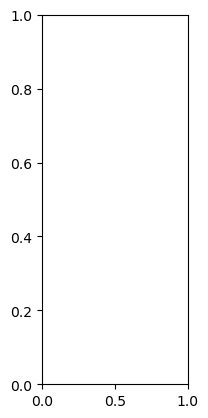

In [32]:
img = cv.imread("images/native-bee.png")

kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
kernel2 = np.array([[-1, -1, -1, -1, -1],
                   [-1, -1, -1, -1, -1],
                   [-1, -1, 25, -1, -1],
                   [-1, -1, -1, -1, -1],
                   [-1, -1, -1, -1, -1]])

dst = cv.filter2D(img, -1, kernel)
dst2 = cv.filter2D(img, -1, kernel2)

plt.subplot(131), matplotlib_show_images(dst, "3x3") 
#sharpend wihtin the range of formula  (sharpened = original + (original − blurred) × amount), pic look obvious and clean
plt.subplot(132), matplotlib_show_images(dst2, "5x5") 
#Way too much sharpend, consists of noise in the picture
plt.subplot(133), matplotlib_show_images(img, "normal")